In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
import plotly.express as px
from PIL import Image
import plotly.graph_objs as go 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


/kaggle/input/2021-olympics-in-tokyo/EntriesGender.xlsx
/kaggle/input/2021-olympics-in-tokyo/Teams.xlsx
/kaggle/input/2021-olympics-in-tokyo/Athletes.xlsx
/kaggle/input/2021-olympics-in-tokyo/Coaches.xlsx
/kaggle/input/2021-olympics-in-tokyo/Medals.xlsx


In [2]:
!pip install openpyxl


     |████████████████████████████████| 242 kB 799 kB/s 


In [3]:
#Preparing the Data

In [4]:
athlete = pd.read_excel('../input/2021-olympics-in-tokyo/Athletes.xlsx',engine='openpyxl')

In [5]:
athlete.head()

,Name,NOC,Discipline
0,AALERUD Katrine,Norway,Cycling Road
1,ABAD Nestor,Spain,Artistic Gymnastics
2,ABAGNALE Giovanni,Italy,Rowing
3,ABALDE Alberto,Spain,Basketball
4,ABALDE Tamara,Spain,Basketball


In [6]:
athlete.dtypes

Name          object
NOC           object
Discipline    object
dtype: object

In [7]:
coach = pd.read_excel('../input/2021-olympics-in-tokyo/Coaches.xlsx',engine='openpyxl')
coach.head()

/opt/conda/lib/python3.7/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning:

Workbook contains no default style, apply openpyxl's default



,Name,NOC,Discipline,Event
0,ABDELMAGID Wael,Egypt,Football,NaN
1,ABE Junya,Japan,Volleyball,NaN
2,ABE Katsuhiko,Japan,Basketball,NaN
3,ADAMA Cherif,Côte d'Ivoire,Football,NaN
4,AGEBA Yuya,Japan,Volleyball,NaN


In [8]:
coach.dtypes

Name          object
NOC           object
Discipline    object
Event         object
dtype: object

In [9]:
gender_entries = pd.read_excel('../input/2021-olympics-in-tokyo/EntriesGender.xlsx',engine='openpyxl')
gender_entries.head()

,Discipline,Female,Male,Total
0,3x3 Basketball,32,32,64
1,Archery,64,64,128
2,Artistic Gymnastics,98,98,196
3,Artistic Swimming,105,0,105
4,Athletics,969,1072,2041


In [10]:
gender_entries.dtypes

Discipline    object
Female         int64
Male           int64
Total          int64
dtype: object

In [11]:
medal = pd.read_excel('../input/2021-olympics-in-tokyo/Medals.xlsx',engine='openpyxl')
medal.head()

/opt/conda/lib/python3.7/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning:

Workbook contains no default style, apply openpyxl's default



,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,United States of America,39,41,33,113,1
1,2,People's Republic of China,38,32,18,88,2
2,3,Japan,27,14,17,58,5
3,4,Great Britain,22,21,22,65,4
4,5,ROC,20,28,23,71,3


In [12]:
medal.dtypes

Rank              int64
Team/NOC         object
Gold              int64
Silver            int64
Bronze            int64
Total             int64
Rank by Total     int64
dtype: object

In [13]:
team = pd.read_excel('../input/2021-olympics-in-tokyo/Teams.xlsx',engine='openpyxl')
team.head()

,Name,Discipline,NOC,Event
0,Belgium,3x3 Basketball,Belgium,Men
1,China,3x3 Basketball,People's Republic of China,Men
2,China,3x3 Basketball,People's Republic of China,Women
3,France,3x3 Basketball,France,Women
4,Italy,3x3 Basketball,Italy,Women


In [14]:
team.dtypes

Name          object
Discipline    object
NOC           object
Event         object
dtype: object

**ANALYSIS ON ATHLETE DATA**

**WORDCLOUD SHOWCASING THE DISCIPLINE IN ORDER OF PARTICIPANT COUNT**

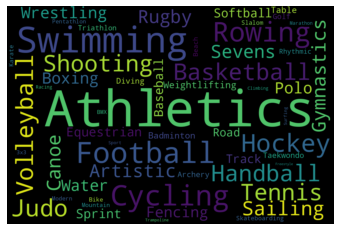

In [15]:
#Wordcloud showcasing the discipline with Max particpants
text = " ".join(discipline for discipline in athlete['Discipline'])
# Create stopword list:
#stopwords = set(STOPWORDS)
#stopwords.update([""])
# Create and generate a word cloud image:
wordcloud = WordCloud(collocations=False,width=1500, height=1000,background_color='Black').generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**CREATING A NEW DF HAVING TOTAL PARTICIPANT COUNT FROM EACH COUNTRY**

In [16]:
#Creating a new Dataframe having total participant count from each country
athlete_count = pd.DataFrame(athlete['NOC'].value_counts().sort_values(ascending=False))
athlete_count.rename(columns = {'NOC':'Count'},inplace=True)
athlete_count.index.rename('NOC',inplace=True)
athlete_count.reset_index(inplace=True)
athlete_count.head()

,NOC,Count
0,United States of America,615
1,Japan,586
2,Australia,470
3,People's Republic of China,401
4,Germany,400


In [17]:
athlete_count.head()

,NOC,Count
0,United States of America,615
1,Japan,586
2,Australia,470
3,People's Republic of China,401
4,Germany,400


**BAR PLOT SHOWCASING THE TOTAL NUMBER PARTICIPANTS FOR EACH COUNTRY**

In [18]:
#Bar plot showcasing total number of participants for each country
fig = px.bar(athlete_count,x='Count',y='NOC',color='NOC',height=4000,width=1000)
fig.update_layout(showlegend=False)
fig.show()

Inference from above plot, USA had the most number of athletes(615) participating,followed by Japan,Australia and China.

**CHOROPLETH SHOWING THE NUMBER OF ATHLETES FROM EACH COUNTRY**

In [19]:
#Renaming ROC as Russia so that it reflects on Choropleth
athlete_count['NOC'].replace('ROC','Russia',inplace=True)

In [20]:
data = dict(
        type = 'choropleth',
        colorscale = 'portland',
        locations = athlete_count['NOC'],
        locationmode = 'country names', 
        z = athlete_count['Count'],
        text = athlete_count['NOC'],
        colorbar = {'title' : 'No. of athletes from each country'},
      ) 
layout = dict(
    title = '2020 Tokyo Athlete Distribution',
    geo = dict(
        showframe = False,
        projection = {'type':'mercator'}
    )
)
choromap = go.Figure(data = [data],layout = layout)
iplot(choromap)

**COUNTRY-WISE MEDALS DISTRIBUTION**

In [21]:
#Distribution of medals across countries
fig = px.bar(medal,x='Team/NOC',y=['Bronze','Silver','Gold'],color_discrete_sequence=['#CD7F32','silver','gold'],hover_name='Rank',height=900,width=2000)
fig.update_layout(yaxis= {'categoryorder':'array', 'categoryarray':['Gold','Silver','Bronze']},xaxis = {'categoryorder':'total descending'})
fig.show()

Inference:USA won the most number of medals followed by China and Russia.

**CHOROPLETH SHOWING MEDAL DISTRIBUTION**

In [22]:
#Renaming ROC as Russia so that it reflects on Choropleth
medal['Team/NOC'].replace('ROC','Russia',inplace=True)

In [23]:
data = dict(
        type = 'choropleth',
        colorscale = 'pinkyl',
        locations = medal['Team/NOC'],
        locationmode = 'country names', 
        z = medal['Total'],
        text = medal['Team/NOC'],
        colorbar = {'title' : 'Country-wise Medal Distribution'},
      ) 
layout = dict(
    title = '2020 Tokyo',
    geo = dict(
        showframe = False,
        projection = {'type':'stereographic'}
    )
)
choromap3 = go.Figure(data = [data],layout = layout)
iplot(choromap3)

**GENDER-WISE DISTRIBUTION OF PARTICPANTS ACROSS DISCIPLINES**

In [24]:
#Gender-wise distribution of participants across countries
fig = px.bar(gender_entries,x='Discipline',y=['Male','Female'],color_discrete_sequence=['Blue','Pink'],barmode='group',hover_name='Total',height=900,width=2000)
fig.update_yaxes(title_text='No. of Participants')
fig.show()

Inference: Athletics had the most number of particpants,i.e.,1072 men and 967 women. Most sports like Cycling BMX Racing,Archery,Basketball,and Artistic Gymnastics etc. had the same participation across genders.While Diving,Cycling BMX Freestyle had more women participants. However, Artistic Swimming and Rhythmic Gymnastics were women-only sports.

**PERCENTAGE OF PARTICIPANTS ACROSS GENDERS**

In [25]:
#Number of participants as % of their gender
fig = px.pie(gender_entries, values=[gender_entries['Female'].sum(),gender_entries['Male'].sum()], names=['Female','Male'],
            color=['Female','Male'],color_discrete_map={'Male':'blue','Female':'pink'})
fig.show()

Inference: Although most sports had equal participation and some were exclusively for women, there were more male(5884) participants compared to women(5432).

**CREATING A NEW DF HAVING TOTAL PARTICIPANT COUNT FROM EACH COUNTRY**

In [26]:
#Creating a new Dataframe having total coach count from each country
coach_count = pd.DataFrame(coach['NOC'].value_counts().sort_values(ascending=False))
coach_count.rename(columns = {'NOC':'Count'},inplace=True)
coach_count.index.rename('NOC',inplace=True)
coach_count.reset_index(inplace=True)
coach_count.head()

,NOC,Count
0,Japan,35
1,Spain,28
2,United States of America,28
3,Australia,22
4,Canada,16


In [27]:
#Renaming ROC as Russia so that it reflects on Choropleth
coach_count['NOC'].replace('ROC','Russia',inplace=True)

**CHOROPLETH FOR NO. OF COACHES ACROSS COUNTRIES**

In [28]:
data = dict(
        type = 'choropleth',
        colorscale = 'earth',
        locations = coach_count['NOC'],
        locationmode = 'country names', 
        z = coach_count['Count'],
        text = coach_count['NOC'],
        colorbar = {'title' : 'No. of coaches from each country'},
      ) 
layout = dict(
    title = '2020 Tokyo Coach Count',
    geo = dict(
        showframe = False,
        projection = {'type':'mercator'}
    )
)
choromap2 = go.Figure(data = [data],layout = layout)
iplot(choromap2)

**WORD CLOUD FOR COACHS' DISCIPLINES**

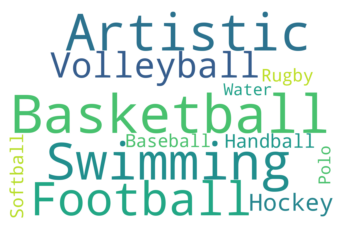

In [29]:

text2 = " ".join(discipline for discipline in coach['Discipline'])
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["Sevens"])
# Create and generate a word cloud image:
wordcloud = WordCloud(collocations=False,stopwords=stopwords,width=1500, height=1000,background_color='White').generate(text2)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**BAR PLOT SHOWING THE NUMBER OF COACHES FROM EACH COUNTRY**

In [30]:
#Bar plot showcasing total number of count for each country
fig = px.bar(coach_count,x='NOC',y='Count',color='Count',hover_name='Count',height=900,width=2000)
fig.update_yaxes(title_text='No. of Coaches from each Country')
fig.show()

Inference: Hosts Japan had the most number of coaches(35) followed by Spain and USA at 28 each.

In [31]:
#Creating a new Dataframe having total coach count from each country
coach_disp = pd.DataFrame(coach['Discipline'].value_counts().sort_values(ascending=False))
coach_disp.rename(columns = {'Discipline':'Count'},inplace=True)
coach_disp.index.rename('Discipline',inplace=True)
coach_disp.reset_index(inplace=True)
coach_disp.head()

,Discipline,Count
0,Basketball,74
1,Artistic Swimming,69
2,Football,59
3,Volleyball,45
4,Hockey,45


In [32]:
#Bar plot showcasing total number of count for each discipline
fig = px.bar(coach_disp,x='Count',y='Discipline',color='Discipline',hover_name='Count',height=1000,width=1000)
fig.update_yaxes(title_text='No. of Coaches from each Discipline')
fig.update_layout(showlegend=False)
fig.show()

Inference: Basketball had the most number of coaches followed by Artistic Swimming.

**WORDCLOUDS WITH NAMES OF COACHES AND ATHLETES :)**

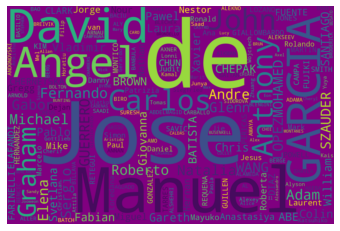

In [33]:
#Just for fun created a wordcloud with the coachs' names :)#
text3 = " ".join(name for name in coach['Name'])
# Create and generate a word cloud image:
wordcloud = WordCloud(collocations=False,width=1500, height=1000,background_color='Purple').generate(text3)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Inference: Seems like Jose,Manuel and David were the most common names among the coaches.

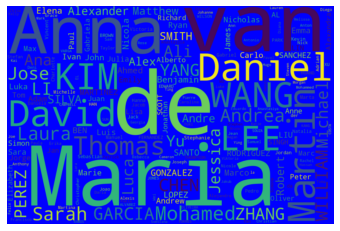

In [34]:
#Just for fun created a wordcloud with the athletes' names :)#
text4 = " ".join(name for name in athlete['Name'])
# Create and generate a word cloud image:
wordcloud = WordCloud(collocations=False,width=1500, height=1000,background_color='Blue').generate(text4)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Inference: Maria,Anna and Daniel were the most common names among the participants.

**Please do leave an upvote if you like it. :)**